**Pulsar Timing** is basically tracking every single rotation of a pulsar. From a pulsar observation, we calculate the times of arrival (**TOAs**) of pulses from that pulsar. Every pulse is related to a certain rotation of the pulsar.

During pulsar timing, we generate a model that can accurately calculate the pulse number corresponding to each TOA and also predict when a particular pulse in the future will arrive. This model is calculated by minimizing the residuals:

**residual = observed TOA - model predicted TOA**.

We start from a basic timing model (**par file**) for the pulsar and calculate the residuals for a set of measured TOAs (**tim file**). Then we fit for different paramters in the model to minimize the residuals.

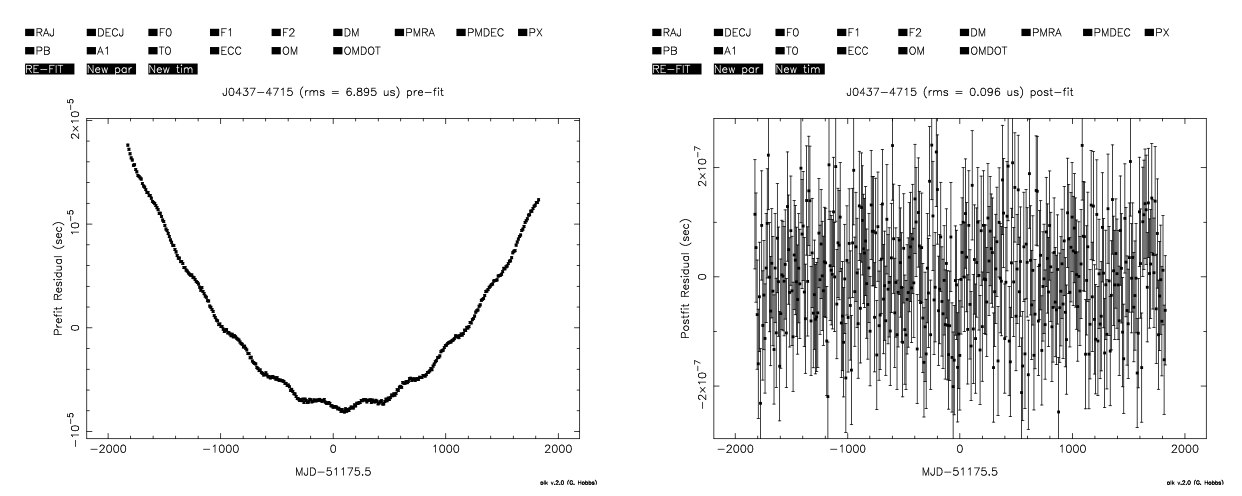

The errors in different parameters in the par file give rise to differetn shapes in the residuals. We can look at the shape of the residuals to decide whaich parameter we should fit for.
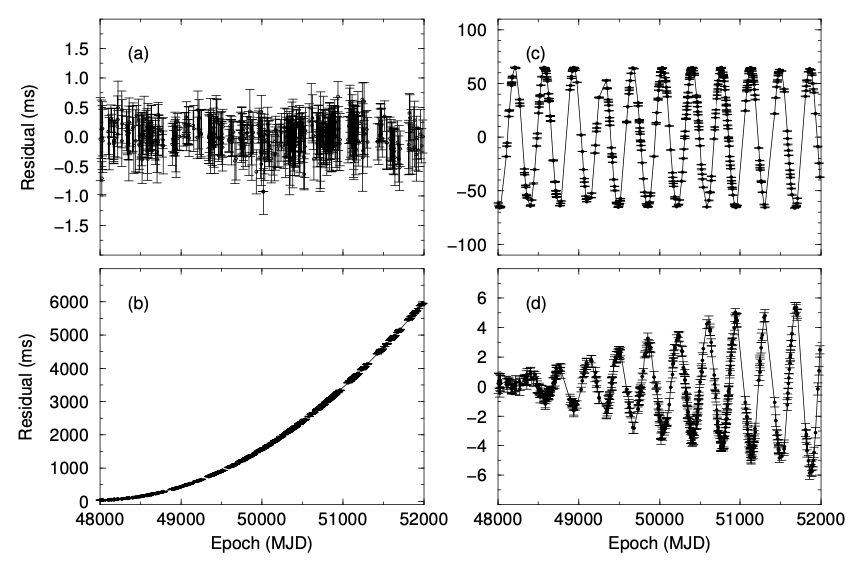

## A par file
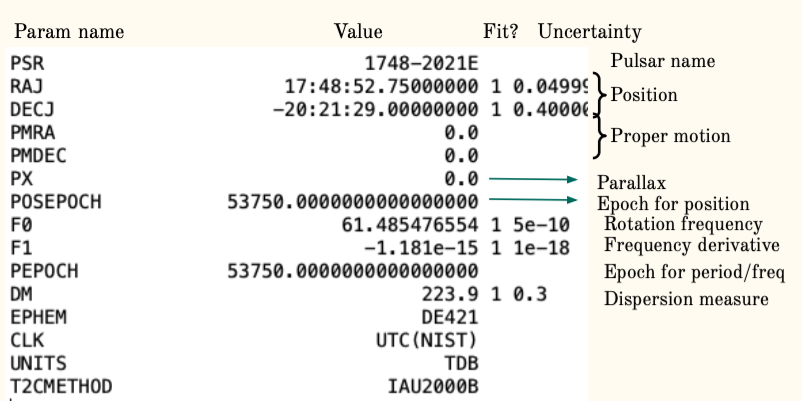

## A tim file
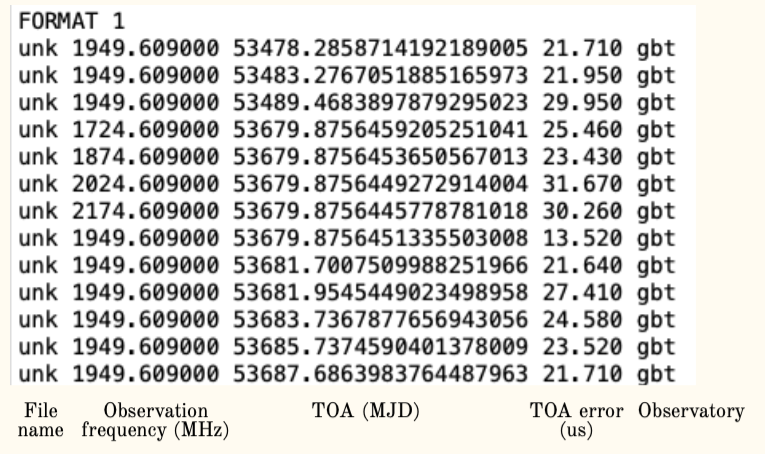

In [305]:
# Importing useful packages
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.fitter
import matplotlib.pyplot as plt
import astropy.units as u
import pint.logging
pint.logging.setup(level="WARNING")

11

In [439]:
# Timing model (par file) and TOAs (tim file) to use
parfile = 'output_60078-86_48_f0.par'
# parfile = "B0531_test_temp.par"
# parfile = "output_59804_f0.par"
# parfile = "output.par"
# timfile = "test_pre_template.tim"
# timfile = "test_TOAs_template.tim"
# timfile = "test_59804_5.tim"
timfile = 'NewcrabTOAsK(60078-60087)-Copy1.txt'

In [440]:
# Creating PINT model (m) and TOA (t_all) object
m, t_all = get_model_and_toas(parfile, timfile)

WARNING  (pint.logging                  ): /opt/conda/lib/python3.10/site-packages/pint/observatory/clock_file.py:176 UserWarning: Data points out of range in clock file 'gps2utc.clk'
WARNING  (pint.logging                  ): /opt/conda/lib/python3.10/site-packages/pint/observatory/clock_file.py:176 UserWarning: Data points out of range in clock file 'time_gbt.dat'


In [441]:
# Print the model
print(m)

# Created: 2023-09-17T21:17:09.753397
# PINT_version: 0.9.6+9.g73a425cc
# User: jovyan
# Host: 09e7476e03ac
# OS: Linux-4.18.0-425.13.1.el8_7.x86_64-x86_64-with-glibc2.31
# Format: pint
PSRJ                           J0534+2200
EPHEM                               DE405
CLOCK                        TT(BIPM2021)
UNITS                                 TDB
START              60078.7677930851374769
FINISH             60086.7772148086613773
RM                                 -45.44 0 0.08
DILATEFREQ                              N
DMDATA                                  N
NTOA                                   48
CHI2                                  0.0
RAJ                      5:34:31.97300000 0 0.00499999999999999143
DECJ                    22:00:52.06000000 0 0.05999999999999999778
PMRA                                -14.7 0 0.8
PMDEC                                 2.0 0 0.8
PX                                    0.0
POSEPOCH           40706.0000000000000000
F0                   29.5810989

In [442]:
# Summary of all TOAs
t_all.print_summary()

Number of TOAs:  52
Number of commands:  1
Number of observatories: 1 ['gbt']
MJD span:  60078.768 to 60087.785
Date span: 2023-05-14 18:25:37.322555878 to 2023-05-23 18:50:47.359948610
gbt TOAs (52):
  Min freq:      1550.244 MHz
  Max freq:      1550.244 MHz
  Min error:     58.8 us
  Max error:     127 us
  Median error:  91.5 us



In [443]:
error_ok = t_all.table["error"] <= 150 * u.us
t = t_all[error_ok]
t.print_summary()

Number of TOAs:  52
Number of commands:  1
Number of observatories: 1 ['gbt']
MJD span:  60078.768 to 60087.785
Date span: 2023-05-14 18:25:37.322555878 to 2023-05-23 18:50:47.359948610
gbt TOAs (52):
  Min freq:      1550.244 MHz
  Max freq:      1550.244 MHz
  Min error:     58.8 us
  Max error:     127 us
  Median error:  91.5 us



16225.60604937359673


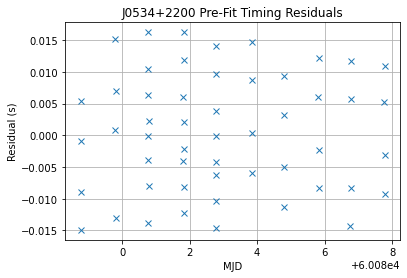

16225.60604937359673


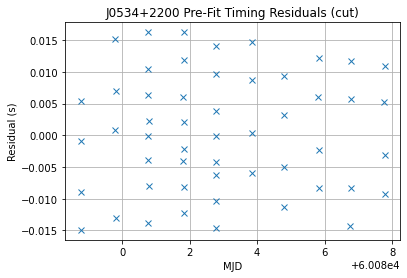

In [444]:
# Calculating the timing residuals = observed TOAs - model predicted TOAs
rs = Residuals(t_all, m)
print(rs.resids.to(u.us).value.max())
# Plotting the residuals
xt = t_all.get_mjds() #TOAs in MJD
plt.figure()
plt.plot(xt, rs.resids, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (s)")
plt.grid()
plt.show()

# Calculating the timing residuals = observed TOAs - model predicted TOAs
rs_cut = Residuals(t, m)
print(rs_cut.resids.to(u.us).value.max())
# Plotting the residuals
xt_cut = t.get_mjds() #TOAs in MJD
plt.figure()
plt.plot(xt_cut, rs_cut.resids, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals (cut)")
plt.xlabel("MJD")
plt.ylabel("Residual (s)")
plt.grid()
plt.show()

In [445]:
# Printing some statistics
print(f"Chi-square = {rs.calc_chi2()}")
print(f"Reduced Chi-square = {rs.reduced_chi2}")
print(f"WRMS = {rs.rms_weighted()}")

Chi-square = 570693.8310412967
Reduced Chi-square = 11413.876620825935
WRMS = 9318.438934750666 us


In [446]:
# Creating PINT fitter object "f"
f = pint.fitter.Fitter.auto(t_all, m)
# Fitting the TOAs by changing model parameters
f.fit_toas()
# Printing summary of the fitting
f.print_summary()

Fitted model using downhill_wls method with 1 free parameters to 52 TOAs
Prefit residuals Wrms = 9318.438934750666 us, Postfit residuals Wrms = 9316.710210927913 us
Chisq = 570482.104 for 50 d.o.f. for reduced Chisq of 11409.642

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J0534+2200 J0534+2200                   None
EPHEM                         DE405 DE405                        None
CLOCK                  TT(BIPM2021) TT(BIPM2021)                 None
UNITS                           TDB TDB                          None
START                       60078.8                      60078.8 d 
FINISH                      60086.8                      60087.8 d 
RM                           -45.44                              rad / m2 
DILATEFREQ                        N                              None
DMDATA                            N                              No

16387.548330672125273


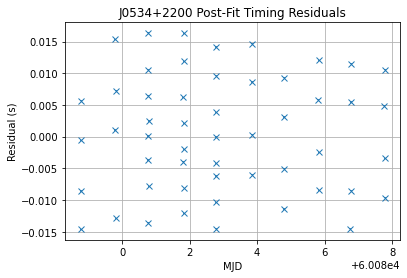

In [447]:
print(f.resids.time_resids.to(u.us).value.max())
plt.figure()
plt.errorbar(
    xt.value,
    f.resids.time_resids.to(u.s).value,
    t_all.get_errors().to(u.s).value,
    fmt="x",
)
plt.title(f"{m.PSR.value} Post-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (s)")
plt.grid()
plt.show()

In [448]:
print(f.model.as_parfile())

# Created: 2023-09-17T21:17:20.245113
# PINT_version: 0.9.6+9.g73a425cc
# User: jovyan
# Host: 09e7476e03ac
# OS: Linux-4.18.0-425.13.1.el8_7.x86_64-x86_64-with-glibc2.31
# Format: pint
PSRJ                           J0534+2200
EPHEM                               DE405
CLOCK                        TT(BIPM2021)
UNITS                                 TDB
START              60078.7677930851374769
FINISH             60087.7852703697755787
RM                                 -45.44 0 0.08
DILATEFREQ                              N
DMDATA                                  N
NTOA                                   52
CHI2                                  0.0
RAJ                      5:34:31.97300000 0 0.00499999999999999143
DECJ                    22:00:52.06000000 0 0.05999999999999999778
PMRA                                -14.7 0 0.8
PMDEC                                 2.0 0 0.8
PX                                    0.0
POSEPOCH           40706.0000000000000000
F0                   29.5810989

In [449]:
f.model.write_parfile('output_60078-87_52_f0.par')